In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_excel("Project Data.xlsx")
df = df.set_index("Patient ID")
df

,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
Patient ID,,,,,,,,,,,,,,,
1499,74.0,Other,Liverpool,Retired,Provider C,Cancer,Undergraduate,Married,2024-02-05,Emergency,93,3,30355.0,375.487634,262.841344
1499,74.0,Other,Liverpool,Retired,Provider C,Cancer,Undergraduate,Married,2024-03-29,Neurology,71,1,37633.0,298.734245,209.113971
1499,74.0,Other,Liverpool,Retired,Provider C,Cancer,Undergraduate,Married,2024-01-09,Endocrinology,36,2,44912.0,254.640126,178.248088
1499,74.0,Other,Liverpool,Retired,Provider C,Cancer,Undergraduate,Married,2024-05-05,Orthopedics,23,4,58955.0,209.233934,146.463754
1499,74.0,Other,Liverpool,Retired,Provider C,Cancer,Undergraduate,Married,2024-02-10,Emergency,26,4,45934.0,205.564537,143.895176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,158.0,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,2024-04-08,Allergology,102,1,57119.0,116.908372,116.908372
1000,158.0,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,2024-06-11,Pulmonology,79,1,51859.0,113.243591,113.243591
1000,158.0,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,2024-04-17,General Practice,19,4,45561.0,99.448030,99.448030


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10008 entries, 1499 to 1000
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Age                        9952 non-null   float64       
 1   Gender                     10008 non-null  object        
 2   City of Residence          10008 non-null  object        
 3   Profession                 10008 non-null  object        
 4   Insurance Provider         8098 non-null   object        
 5   Family History             8015 non-null   object        
 6   Education Level            9979 non-null   object        
 7   Marital Status             10008 non-null  object        
 8   Visit Date                 10008 non-null  datetime64[ns]
 9   Department                 10008 non-null  object        
 10  Consultation Duration      10008 non-null  int64         
 11  Satisfaction Level         10008 non-null  int64         
 12  Approxi

In [16]:
df.describe()

,Age,Visit Date,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
count,9952.000000,10008,10008.000000,10008.000000,9.854000e+03,10008.000000,9958.000000
mean,50.635651,2024-03-31 14:53:14.244604416,67.807654,3.202338,4.340276e+04,187.263022,115.429366
min,0.000000,2024-01-01 00:00:00,15.000000,1.000000,0.000000e+00,50.036762,0.000000
25%,23.000000,2024-02-15 00:00:00,41.000000,2.000000,3.115775e+04,111.316562,59.692518
50%,52.000000,2024-03-31 00:00:00,68.000000,3.000000,4.087650e+04,159.531115,115.938998
75%,75.000000,2024-05-16 00:00:00,94.000000,5.000000,5.072175e+04,199.820999,165.437958
max,195.000000,2024-06-30 00:00:00,600.000000,6.000000,1.197090e+07,39999.222018,421.887836
std,31.185608,NaN,32.447143,1.565507,2.681420e+05,862.865550,79.337759


In [69]:
df.describe(include="datetime")

,Visit Date
count,10008
mean,2024-03-31 14:53:14.244604416
min,2024-01-01 00:00:00
25%,2024-02-15 00:00:00
50%,2024-03-31 00:00:00
75%,2024-05-16 00:00:00
max,2024-06-30 00:00:00


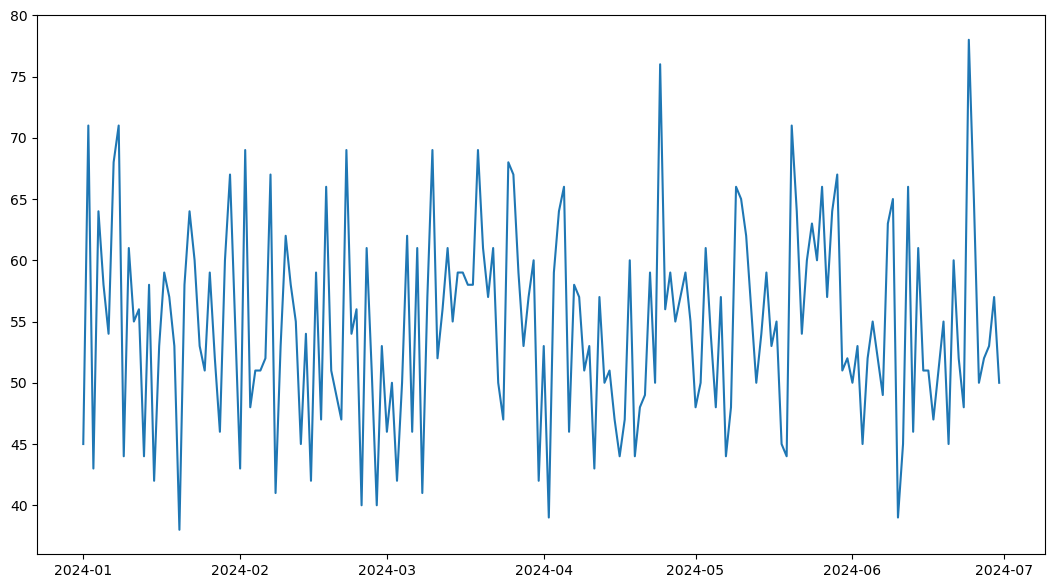

In [84]:
date_freq = df.groupby(by="Visit Date").count().iloc[:, 0]

fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(date_freq)

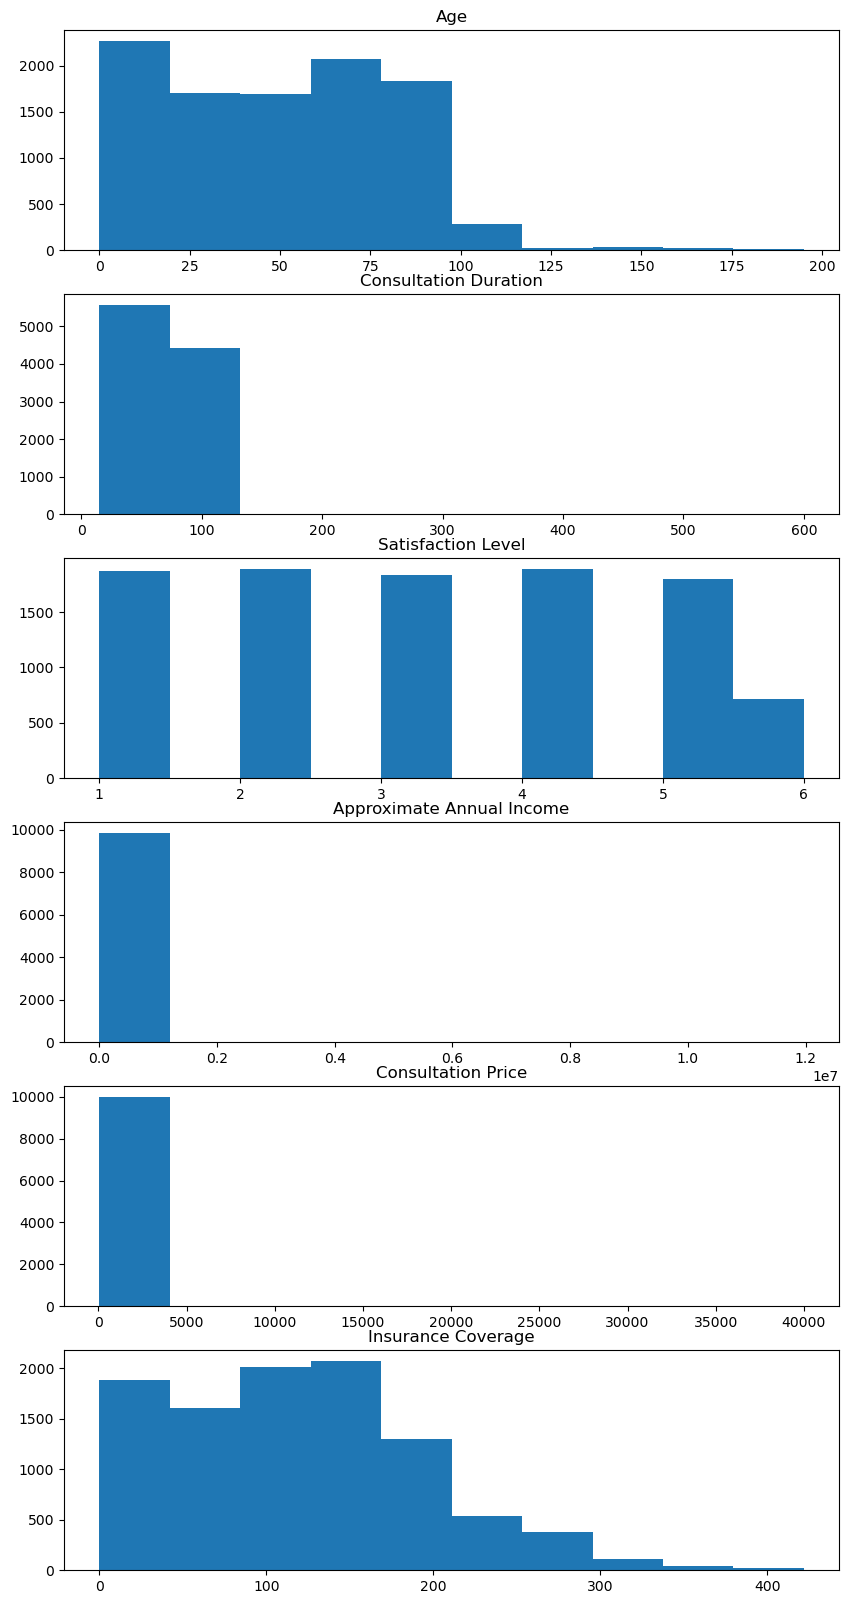

In [21]:
T  = df.select_dtypes(exclude=["O", "datetime"]).columns.tolist()
fig, axes = plt.subplots(len(T), 1, figsize=(10, 20))


for i,column in enumerate(T):
    axes[i].hist(df[column])
    axes[i].set_title(column)

In [ ]:
df['Insurance Provider'].value_counts().astype()

Insurance Provider
Provider D    2165
Provider A    2005
Provider B    1986
Provider C    1942
Name: count, dtype: int64